# Convolution Layer

In [ ]:
# Settings
import keras

nCategories = 10
WIDTH, HEIGHT = 28, 28
NLAYER = 1
names = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

conv1_nKernel=32
conv2_nKernel=64
dense1_output=64
dense2_output=10

/Users/skim0119/venv/GenP3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/skim0119/venv/GenP3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Prepare CIFAR Dataset
- Dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
- [Keras Datasets](https://keras.io/datasets/)

In [ ]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, HEIGHT*WIDTH, NLAYER)
x_test = x_test.reshape(-1, HEIGHT*WIDTH, NLAYER)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = (255-x_train)/255
x_test = (255-x_test)/255
t = y_train
y_train = keras.utils.to_categorical(y_train, nCategories)
y_test = keras.utils.to_categorical(y_test, nCategories)

### Dataset Viasualize

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(11,4))

for i in range(30):
    subplot = fig.add_subplot(3, 10, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % t[i])
    subplot.imshow(x_train[i].reshape(HEIGHT,WIDTH), vmin=0, vmax=1, cmap='gray',
                 interpolation='nearest')

In [15]:
x_train.shape

(60000, 784, 1)

## Convolution Filter with Keras

In [16]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras import backend as K

In [17]:
# Build Layers
model = Sequential()

# First Convolution Layer (32 kernels)
model.add(Conv2D(conv1_nKernel, input_shape=(HEIGHT,WIDTH,NLAYER),
                 kernel_size=(3,3),
                 padding='SAME',
                 activation='relu',
                 kernel_initializer = 'truncated_normal'
                ))
model.add(Conv2D(conv2_nKernel,
                 kernel_size=(3,3),
                 padding='SAME',
                 activation='relu',
                 kernel_initializer = 'truncated_normal'
                ))

# Pool
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(dense1_output, activation='tanh',
               kernel_initializer='truncated_normal',
               bias_initializer='zeros'
               ))
model.add(Dense(dense2_output, activation='softmax',
               kernel_initializer='zeros',
               bias_initializer='zeros'
               ))

In [18]:
# Define Compiler
model.compile(loss='categorical_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])

## Training

In [19]:
model.fit(x_train.reshape(-1,HEIGHT,WIDTH,NLAYER), y_train, batch_size=100, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.6004 - acc: 0.7993
Epoch 2/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.3084 - acc: 0.8894
Epoch 3/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.2593 - acc: 0.9064
Epoch 4/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.2273 - acc: 0.9174
Epoch 5/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.2043 - acc: 0.9262
Epoch 6/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.1852 - acc: 0.9343
Epoch 7/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.1696 - acc: 0.9396
Epoch 8/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.1560 - acc: 0.9445
Epoch 9/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.1459 - acc: 0.9480
Epoch 10/10
60000/60000 [==============================] - 120s 2ms/step - loss: 0.1345 - a

## Prediction

In [20]:
result = model.evaluate(x_test.reshape(-1,HEIGHT,WIDTH,NLAYER), y_test, verbose=1)
print('loss:', result[0], 'accuracy:', result[1])

10000/10000 [==============================] - 8s 764us/step
loss: 0.22073937928676604 accuracy: 0.925


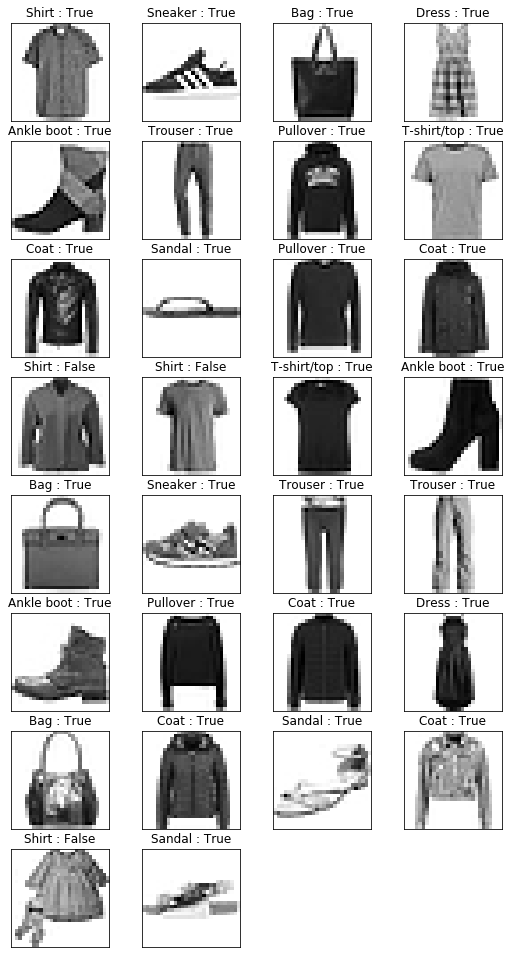

In [23]:
import matplotlib.pyplot as plt
import numpy as np

nShowSample = 30

sampleInd = np.random.choice(x_test.shape[0], nShowSample)

x_sample = x_sample = x_test[sampleInd]
y_sample = y_sample = y_test[sampleInd]

pred = model.predict(x_sample.reshape(-1,HEIGHT,WIDTH,NLAYER))

nCol = 4
nRow = int(nShowSample/nCol)+1
w, h = 2, 2
fig = plt.figure(figsize=( (nCol*w)+1, (nRow*h)+1))

for i in range(nShowSample):
    subplot = fig.add_subplot(nRow, nCol, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    predictedInd = np.argmax(pred[i])
    isCorrect = (predictedInd == np.argmax(y_sample[i]))
    subplot.set_title('%s : %s' % (names[predictedInd],isCorrect))
    subplot.imshow(x_sample[i].reshape(HEIGHT,WIDTH), vmin=0, vmax=1, cmap='gray',
                 interpolation='nearest')

In [1]:
model.get_config()

NameError: name 'model' is not defined